<a href="https://colab.research.google.com/github/ellenwang995/final_project/blob/main/USElectricityMarkets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Variation in US Retail Electricity Price Growth**
##### *Python for Public Policy - Final Project*
##### *Ellen Wang*
##### *UNI: elw2164*



---


---

## **Introduction:**
Amidst the AI craze of the past few years, there has been growing concern that the increased demand for electricity to power large data centers will pose a threat to energy accessibility and affordability. However, this concern with rising electricity prices is not new. A new Berkeley Lab report published early 2025 discusses how residential retail prices, post-2021, have been increasing faster than inflation, meaning that real prices of retail electricity for residential consumers has been increasing.

However, what is interesting is that the increase in retail electricity price at the national level can not be attributed to increased demand, as retail electricity sales stayed relatively constant from 2019-2023 [(Energy Markets and Policy Lab - Berkeley Lab 2025)](https://emp.lbl.gov/news/new-berkeley-lab-report-summarizes-trends-retail-electricity-prices-and-price-drivers). The main area of increased cost from 2019-2024 was the augmentation of capital expenditures on distribution infrastructure as well as distribution operations and maintenance expenditures.

Characteristics of distribution infrastructure and maintenance needs are likely to be unique to different grids in the US. Thus, for this project, I am interested in comparing residential retail electricity prices in two of the largest electricity grids in the US—CAISO (California) and ERCOT (Texas)—and the factors that could impact these price differentials.





---


## **Methodology:**

For this research, I will use the Pandas, Poltly, NLTK, Matplotlib and PyPDF2 libraries in python to assess price differentials in residential retail electricity prices and the potential reasons for these price differentials. The paper will be structured into three sections: comparing prices and demand in the retail electricity market, examining prices and supply composition in the wholesale market, and investigating changes in electricity market regulation.

#### *Retail Electricity Market*

To first understand the difference between residential retail electricity prices in ERCOT and CAISO, I will use Pandas to explore, clean, and organize data sourced from the U.S. Energy Information Administration [(U.S. Energy Information Administration 2025)](https://www.eia.gov/electricity/data/eia861m/xls/sales_revenue.xlsx). This data shows residential electricity prices and total sales for each state, every month spanning from 2010 to July 2025. After cleaning the data, I will use Poltly to graph the prices and sales in Texas and California to compare the markets in the two states.

#### *Wholesale Electricity Market*

Next, I will use data sourced from the Energy Markets and Policy Lab branch of Berkeley Lab that shows wholesale electricity prices and load composition (two categories of renewable energy—or wind and utility solar—and non-renewable energy) for seven different grids in the US. Prices and load composition are shown hourly by season for each grid [(Energy Markets and Policy Lab - Berkeley Lab 2024)](https://emp.lbl.gov/renewables-and-wholesale-electricity-prices-rewep). Again for this data, I will use Pandas to explore and clean the data. Specifically for this dataset, I will need to mutate the dataframe to add two variables: the average seasonal wholesale price for each year and the proportion of renewable energy load for each year (as a weighted average). I will then use Poltly to graph and analyze average seasonal wholesale prices and the change in proportion of renewable energy load on the CAISO and ERCOT grid.

#### *Market Regulation*

Finally, I will use NLTK, PyPDF2, and Matplotlib to assess three regulation documents regarding changes in retail electricity price formulation in CAISO from 2017-2026, specifically for the largest utility company in California—Pacific Gas & Electric [(California Public Utilities Commission 2017-2023)](https://www.cpuc.ca.gov/industries-and-topics/electrical-energy/electric-rates/general-rate-case/pacific-gas-and-electric-grc-proceedings). Prices in the ERCOT retail electricity market are determined mostly by the comepetitve market and less regulated, which is why there is no equivalent documentation for ERCOT [(Kelly-Detwiler 2018)](https://www.gevernova.com/gas-power/resources/articles/2018/a-tale-of-two-isos-energy-market-design-in-Texas-and-California). This distinction is why I will only analyze CAISO regulation, which will be further explained in the discussion section.

The regulation documents analyzed are sourced from the California Public Utilities Commission website as PDFs, which will then be converted into text using PyPDF2. I will use tools from NLTK such as tokenization, lemmetization, and cleaning for stopwords to organize the texts. These normalized texts will then be run through the frequency distribution tool in Matplotlib, allowing me to assess the change in rationale for increasing retail electricity prices from 2017-2026.






---

## **Results:**

### Retail Electricity Market




#### Importing, Explorning, and Cleaning the Data

First, I imported the retail market data sourced from EIA [(Energy Markets and Policy Lab - Berkeley Lab 2024)](https://emp.lbl.gov/renewables-and-wholesale-electricity-prices-rewep), which can be found in my repository in GitHub. The name of the file is "MonthlyPrice_State.xlsx"

I then checked which variables and what type of variables are included in the dataset, converting "Date" into a date and time variable. Finally, I checked for duplicates.

In [1]:
#importing Pandas library and EIA data for residential retail electricty prices and sales
import pandas as pd

price_df = pd.read_excel("/content/MonthlyPrice_State.xlsx")
price_df.head()

,Year,Month,Date,State,Price,Sales,Revenue
0,2025,7,Jul 2025,Alaska,27.30,148350.34,40502.62
1,2025,7,Jul 2025,Alabama,15.88,3708754.80,589018.84
2,2025,7,Jul 2025,Arkansas,13.23,2100595.40,277912.37
3,2025,7,Jul 2025,Arizona,15.38,5247371.70,806999.60
4,2025,7,Jul 2025,California,32.58,8266152.60,2693302.60


In [2]:
#explore the data
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     9537 non-null   int64  
 1   Month    9537 non-null   int64  
 2   Date     9537 non-null   object 
 3   State    9537 non-null   object 
 4   Price    9537 non-null   float64
 5   Sales    9537 non-null   float64
 6   Revenue  9537 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 521.7+ KB


In [3]:
#change the variable "Date" to a date and time variable type
price_df['Date_dt'] = pd.to_datetime(price_df['Date'], format = '%b %Y')
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Year     9537 non-null   int64         
 1   Month    9537 non-null   int64         
 2   Date     9537 non-null   object        
 3   State    9537 non-null   object        
 4   Price    9537 non-null   float64       
 5   Sales    9537 non-null   float64       
 6   Revenue  9537 non-null   float64       
 7   Date_dt  9537 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 596.2+ KB


I used the python documentation book to look up how to format the last argument to fit the format of the variable "Date" in my dataset. I found that %b represents an abbreviated month format [(Python Software Foundation, 2001)](https://docs.python.org/3/library/datetime.html#format-codes).

In [4]:
#checking for duplicates
price_df[price_df.duplicated(keep=False)].sort_values(by=['Date_dt', 'State'])
price_df[price_df.duplicated(keep = False)]

,Year,Month,Date,State,Price,Sales,Revenue,Date_dt


#### Mutating the Exisitng Data Frame

In addition to looking into change in electricity prices and price volatility on a macro time scale, it is also important to assess volatility throughout the year. This is why I also create a separate data frame isolated for electricity prices and sales during the year 2016 and 2024.

In [5]:
#creating another new data frame price_2024 with all the entries from price_df that have the year 2024
price_2024 = price_df[price_df['Date_dt'].dt.year == 2024]
price_2024

,Year,Month,Date,State,Price,Sales,Revenue,Date_dt
357,2024,12,Dec 2024,Alaska,22.38,211868.21,47425.22,2024-12-01
358,2024,12,Dec 2024,Alabama,14.91,2788677.20,415668.94,2024-12-01
359,2024,12,Dec 2024,Arkansas,11.74,1499647.50,176081.29,2024-12-01
360,2024,12,Dec 2024,Arizona,15.20,2353304.30,357730.26,2024-12-01
361,2024,12,Dec 2024,California,30.55,7074452.60,2161521.30,2024-12-01
...,...,...,...,...,...,...,...,...
964,2024,1,Jan 2024,Vermont,21.14,230484.45,48712.78,2024-01-01
965,2024,1,Jan 2024,Washington,11.07,4694306.70,519574.15,2024-01-01
966,2024,1,Jan 2024,Wisconsin,16.54,2189903.50,362248.76,2024-01-01
967,2024,1,Jan 2024,West Virginia,13.65,1301973.60,177732.18,2024-01-01


In [6]:
#creating a new data frame price_2016 with all the entries from price_df that have the year 2016
price_2016 = price_df[price_df['Date_dt'].dt.year == 2016]
price_2016

,Year,Month,Date,State,Price,Sales,Revenue,Date_dt
5253,2016,12,Dec 2016,Alaska,20.17,224355.91,45243.16,2016-12-01
5254,2016,12,Dec 2016,Alabama,11.96,2579366.50,308518.17,2016-12-01
5255,2016,12,Dec 2016,Arkansas,9.48,1413122.00,133996.72,2016-12-01
5256,2016,12,Dec 2016,Arizona,11.23,2252766.80,252889.54,2016-12-01
5257,2016,12,Dec 2016,California,18.16,7308559.00,1327060.50,2016-12-01
...,...,...,...,...,...,...,...,...
5860,2016,1,Jan 2016,Vermont,16.65,211324.69,35191.09,2016-01-01
5861,2016,1,Jan 2016,Washington,9.24,3969633.50,366719.54,2016-01-01
5862,2016,1,Jan 2016,Wisconsin,13.45,2174100.20,292517.81,2016-01-01
5863,2016,1,Jan 2016,West Virginia,10.69,1430145.10,152855.05,2016-01-01


#### Data Visualizations

Here, we create line graphs for change in electricity prices and sales across the whole time frame of 2010 - 2024, as well as individual grpahs for year 2016 and 2024 using the Plotly Library. I created the graphs using functions so that the state could be changed if I wanted to compare or add other states, as well as use other data frames (ex. different years).

In [7]:
# Install plotly
import plotly.express as px

In [42]:
#line graph for electricity prices
def price_fig(df, state, title):

#I used AI to help me create the following line of code allowing for variation in state selection
    if state == 'all':
        filtered_df = df
    else:
        filtered_df = df[df['State'].isin(state)]

    pricefig = px.line(filtered_df, x='Date_dt', y='Price', color='State',
                       title=title,
                       labels={'Date_dt': 'Time', 'Price': 'Price (cents/kWh)'})

    return pricefig

state = ["California", "Texas"]

#Figure 1 shows the change in electricity prices from 2010-2024 for California and Texas.
pricefig1 = price_fig(price_df, state, 'Fig 1. Change in Retail Electricity Price (2010-2024)')
pricefig1.show()

#Figure 2 shows the change in electricity prices during 2024 for California and Texas.
pricefig2 = price_fig(price_2024, state, 'Fig 2. Change in Retail Electricity Price (2024)')
pricefig2.show()

#Figure 3 shows the change in electricity prices during 2016 for California and Texas.
pricefig3 = price_fig(price_2016, state, 'Fig 3. Change in Retail Electricity Price (2016)')
pricefig3.show()

AI input for creating the function so the graphs could change by selecting different states:

I have a code that produces a line graph using a function allowing for variation in dataframe, state, and title input. How can I create a statement that allows for the change in state or have multiple states?

def price_fig(df, state, title): pricefig = px.line(df, x='Date_dt', y='Price', color='State', title=title, labels={'Date_dt': 'Date', 'Price': 'Price (cents/kWh)'}) return pricefig

AI Output:

AI gave me the command

    if state == 'all':
        filtered_df = df
    else:
        filtered_df = df[df['State'].isin(state)]

and changed the dataframe input in the px.line function to the created variable filtered_df

In [54]:
#line graphs for retail electricity sales
def sales_fig(df, state, title):

    if state == 'all':
        filtered_df = df
    else:
        filtered_df = df[df['State'].isin(state)]


    salesfig = px.line(filtered_df, x='Date_dt', y='Sales', color='State',
                       title=title,
                       labels={'Date_dt': 'Time', 'Sales': 'Sales (MWh)'})

    return salesfig

state = ["California", "Texas"]


salesfig1 = sales_fig(price_df, state, 'Fig 4. Change in Electricity Sales (2010-2024)')
salesfig1.show()

salesfig2 = sales_fig(price_2024, state, 'Fig 5. Change in Electricity Sales (2024)')
salesfig2.show()

salesfig3 = sales_fig(price_2016, state, 'Fig 6. Change in Electricity Sales (2016)')
salesfig3.show()

### Wholesale Electricity Market



#### Importing, Explorning, and Cleaning the Data

Next, I imported the retail market data sourced from the Energy Markets and Policy Lab of Berekely Lab [(Energy Markets and Policy Lab - Berkeley Lab 2024)](https://emp.lbl.gov/renewables-and-wholesale-electricity-prices-rewep), which can be found in my repository in GitHub. The name of the files are "ISOprice.xlsx" and "RE_load.xlsx"

I then checked which variables and what type of variables are included in the dataset. For this data set, I was also interest in seeing what categories and and how many values were in each categorial variable, allowing me to standardize across grid region (iso) and time (year and season) and check for duplicates.

I found that this data includes hourly wholesale electricity prices for each season (Winter, Spring, Summer, and Fall), for 7 different Independent Systems Operators (ISO) or regional grid. The data spans from 2012-2024.

In [10]:
#importing wholesale market data
ISOprice_df = pd.read_excel("/content/ISOprice.xlsx")
ISOprice_df.head()

load_df = pd.read_excel("/content/RE_load.xlsx")
load_df.head()

,iso,year,season,hour,re_gw,net_load_gw
0,All ISOs,2012,All year,0,14.2,221.1
1,All ISOs,2012,All year,1,14.0,210.9
2,All ISOs,2012,All year,2,13.7,205.0
3,All ISOs,2012,All year,3,13.4,202.6
4,All ISOs,2012,All year,4,13.1,205.4


In [11]:
#gain an overview on the type of data in data frame
ISOprice_df.info()
load_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11376 entries, 0 to 11375
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   iso             11376 non-null  object 
 1   year            11376 non-null  int64  
 2   season          11376 non-null  object 
 3   hour            11376 non-null  int64  
 4   real_price_mwh  11376 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 444.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12480 entries, 0 to 12479
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   iso          12480 non-null  object 
 1   year         12480 non-null  int64  
 2   season       12480 non-null  object 
 3   hour         12480 non-null  int64  
 4   re_gw        12480 non-null  float64
 5   net_load_gw  12480 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 585.1+ KB


In [12]:
#exploring the categorical variables
print(ISOprice_df['iso'].value_counts())
print(ISOprice_df['season'].value_counts())

print(load_df['iso'].value_counts())
print(load_df['season'].value_counts())

iso
CAISO       1560
ISO-NE      1560
NYISO       1560
MISO        1560
PJM         1560
ERCOT       1296
SPP         1200
All ISOs    1080
Name: count, dtype: int64
season
Fall (Oct-Dec)      2280
Winter (Jan-Mar)    2280
Spring (Apr-Jun)    2280
Summer (Jul-Sep)    2280
All year            2256
Name: count, dtype: int64
iso
All ISOs    1560
CAISO       1560
ERCOT       1560
ISO-NE      1560
MISO        1560
NYISO       1560
PJM         1560
SPP         1560
Name: count, dtype: int64
season
All year            2496
Fall (Oct-Dec)      2496
Spring (Apr-Jun)    2496
Summer (Jul-Sep)    2496
Winter (Jan-Mar)    2496
Name: count, dtype: int64


I used the pandas documentation book to find which function I can use to list how many values are assigned to each category. I found that I could use the function .value_counts to show all the categories in the categorical variables I was interested in and the number of values in each category [(pandas development team, 2025)](https://pandas.pydata.org/docs/user_guide/categorical.html#categoricaldtype).

In [13]:
#we see that for the wholesale price data, ERCOT (Texas) has less data than for CAISO (California).
#thus, we should standardize the data to only include years where both ERCOT and CAISO have data
isoyears = ISOprice_df.groupby('iso')['year'].unique()
print(isoyears)

iso
All ISOs    [2015, 2016, 2017, 2018, 2019, 2020, 2021, 202...
CAISO       [2012, 2013, 2014, 2015, 2016, 2017, 2018, 201...
ERCOT       [2014, 2015, 2016, 2017, 2018, 2019, 2020, 202...
ISO-NE      [2012, 2013, 2014, 2015, 2016, 2017, 2018, 201...
MISO        [2012, 2013, 2014, 2015, 2016, 2017, 2018, 201...
NYISO       [2012, 2013, 2014, 2015, 2016, 2017, 2018, 201...
PJM         [2012, 2013, 2014, 2015, 2016, 2017, 2018, 201...
SPP         [2015, 2016, 2017, 2018, 2019, 2020, 2021, 202...
Name: year, dtype: object


In [14]:
#remove data from before 2015 for all ISOs
ISOprice_df = ISOprice_df[ISOprice_df['year'] >= 2015]
load_df = load_df[load_df['year'] >= 2015]

print(ISOprice_df['iso'].value_counts())
print(ISOprice_df['season'].value_counts())

print(load_df['iso'].value_counts())
print(load_df['season'].value_counts())

iso
CAISO       1200
ERCOT       1200
ISO-NE      1200
MISO        1200
PJM         1200
NYISO       1200
SPP         1200
All ISOs    1080
Name: count, dtype: int64
season
Winter (Jan-Mar)    1920
Fall (Oct-Dec)      1896
Spring (Apr-Jun)    1896
Summer (Jul-Sep)    1896
All year            1872
Name: count, dtype: int64
iso
All ISOs    1200
CAISO       1200
ERCOT       1200
ISO-NE      1200
MISO        1200
NYISO       1200
PJM         1200
SPP         1200
Name: count, dtype: int64
season
All year            1920
Fall (Oct-Dec)      1920
Spring (Apr-Jun)    1920
Summer (Jul-Sep)    1920
Winter (Jan-Mar)    1920
Name: count, dtype: int64


In [15]:
#checking for duplicates
ISOprice_df[ISOprice_df.duplicated(keep=False)].sort_values(by=['iso', 'year', 'season', 'hour'])
ISOprice_df[ISOprice_df.duplicated(keep = False)]

,iso,year,season,hour,real_price_mwh


In [16]:
load_df[load_df.duplicated(keep=False)].sort_values(by=['iso', 'year', 'season', 'hour'])
load_df[load_df.duplicated(keep = False)]

,iso,year,season,hour,re_gw,net_load_gw


#### Mutating the Exisitng Data Frame

Before creating lines graphs to analyze the differences in CAISO and ERCOT wholesale markets, I needed to restrucutre both the ISOprice_df and load_df data frames.

*ISOprice_df* - wholesale electricity prices

The data provided hourly variations in wholesale electricity price, which is a bit too granulary for the purposes of this research. Thus, I took the average price across hours 0-23 and created a new variable Avg_Price. Because I used the 'group by' function, I needed to reorder the data chronologically by season and year. The orginial data set included a category of "all year" in seasons, which was dropped when reordering the chronology because I did not define "all year" as a season. Additonally, because season and year are two different variables, I wanted to create another variable joining the two.

Finally, I created a new dataframe to adjust for the energy crisis in 2021, allowing me to analyze price dynamics before and after the crisis.

*load_df* - load (or supply) composition

This data is again provided in hourly variations, so I created a new varaible with the weighted average percent of  renewable energy supply. I did this by first summing the hourly renewable energy supply and non-renewable energy supply for each season and year, and then creating a new variable "pct_re," which was summed renewable supply / (summed renewable supply + summed non-renewable supply). Finally, I did the same as with the wholesale electricity price data frame (ISOprice_df) by reordering the data chronologically, creating a new "Time" variable which joined season and year and making two new data frames for before and after 2021.

In [17]:
#creating new df for wholesale price
season_avg = ISOprice_df.groupby(['iso', 'season', 'year'])['real_price_mwh'].mean().reset_index()
season_avg.columns = ['ISO', 'Season', 'Year', 'Avg_Price']

season_avg.head(300)

,ISO,Season,Year,Avg_Price
0,All ISOs,All year,2016,32.975000
1,All ISOs,All year,2017,35.116667
2,All ISOs,All year,2018,41.320833
3,All ISOs,All year,2020,25.708333
4,All ISOs,All year,2021,66.841667
...,...,...,...,...
295,PJM,All year,2015,41.583333
296,PJM,All year,2016,34.191667
297,PJM,All year,2017,35.933333
298,PJM,All year,2018,42.604167


In [18]:
#reodering chronologically
#used the help of AI to develop the following code
season_order = ['Winter (Jan-Mar)', 'Spring (Apr-Jun)', 'Summer (Jul-Sep)', 'Fall (Oct-Dec)']

season_avg['Season'] = pd.Categorical(season_avg['Season'],
                                      categories=season_order,
                                      ordered=True)

season_avg = season_avg.sort_values(by=['ISO', 'Year', 'Season']).reset_index(drop=True)

season_avg = season_avg.dropna(subset=['Season'])
#because we did not define "all year", it will be given a NaN value. We want these values to be taken out if we are conducting a time series analysis

season_avg.head(100)

,ISO,Season,Year,Avg_Price
0,All ISOs,Winter (Jan-Mar),2015,50.495833
1,All ISOs,Fall (Oct-Dec),2015,29.445833
2,All ISOs,Winter (Jan-Mar),2016,28.012500
3,All ISOs,Spring (Apr-Jun),2016,29.341667
4,All ISOs,Summer (Jul-Sep),2016,37.950000
...,...,...,...,...
117,ERCOT,Summer (Jul-Sep),2019,85.441667
118,ERCOT,Fall (Oct-Dec),2019,32.937500
120,ERCOT,Winter (Jan-Mar),2020,27.383333
121,ERCOT,Spring (Apr-Jun),2020,20.250000


AI input to reorder the data by season and year:

I have a dataframe that needs to be ordered chronologically by season according to two other categorical variables "Year" and "ISO" the seasons are 'Winter (Jan-Mar)', 'Spring (Apr-Jun)', 'Summer (Jul-Sep)', 'Fall (Oct-Dec)'

AI output code:

     season_order = [
    'Winter (Jan-Mar)',
    'Spring (Apr-Jun)',
    'Summer (Jul-Sep)',
    'Fall (Oct-Dec)'
    ]
    
    df['Season'] = pd.Categorical(df['Season'], categories=season_order, ordered=True)
    
    df = df.sort_values(by=['ISO', 'Year', 'Season']).reset_index(drop=True)




In [19]:
#before we can create a line graph, we need to consolidate a variable for Season and Year
season_avg['Time'] = season_avg['Season'].astype(str) + ' ' + season_avg['Year'].astype(str)

season_avg.head(100)

,ISO,Season,Year,Avg_Price,Time
0,All ISOs,Winter (Jan-Mar),2015,50.495833,Winter (Jan-Mar) 2015
1,All ISOs,Fall (Oct-Dec),2015,29.445833,Fall (Oct-Dec) 2015
2,All ISOs,Winter (Jan-Mar),2016,28.012500,Winter (Jan-Mar) 2016
3,All ISOs,Spring (Apr-Jun),2016,29.341667,Spring (Apr-Jun) 2016
4,All ISOs,Summer (Jul-Sep),2016,37.950000,Summer (Jul-Sep) 2016
...,...,...,...,...,...
117,ERCOT,Summer (Jul-Sep),2019,85.441667,Summer (Jul-Sep) 2019
118,ERCOT,Fall (Oct-Dec),2019,32.937500,Fall (Oct-Dec) 2019
120,ERCOT,Winter (Jan-Mar),2020,27.383333,Winter (Jan-Mar) 2020
121,ERCOT,Spring (Apr-Jun),2020,20.250000,Spring (Apr-Jun) 2020


I debugged with AI in this section because I did not know to clarify data types when adding strings together.

AI input:

what is wrong with this code season_avg['Time'] = season_avg['Season'] + ' ' + season_avg['Year'] season_avg.head(100)

AI Output:

It told me to add .astype(str) at the end of Year.

In [20]:
#create a dataframe including only the years before the energy crisis in 2021 and after 2020 when retail prices start diverging more between California and Texas
isoprice_2020 = season_avg[season_avg['Year'] <= 2020]
isoprice_2020

,ISO,Season,Year,Avg_Price,Time
0,All ISOs,Winter (Jan-Mar),2015,50.495833,Winter (Jan-Mar) 2015
1,All ISOs,Fall (Oct-Dec),2015,29.445833,Fall (Oct-Dec) 2015
2,All ISOs,Winter (Jan-Mar),2016,28.012500,Winter (Jan-Mar) 2016
3,All ISOs,Spring (Apr-Jun),2016,29.341667,Spring (Apr-Jun) 2016
4,All ISOs,Summer (Jul-Sep),2016,37.950000,Summer (Jul-Sep) 2016
...,...,...,...,...,...
368,SPP,Fall (Oct-Dec),2019,22.608333,Fall (Oct-Dec) 2019
370,SPP,Winter (Jan-Mar),2020,19.066667,Winter (Jan-Mar) 2020
371,SPP,Spring (Apr-Jun),2020,16.033333,Spring (Apr-Jun) 2020
372,SPP,Summer (Jul-Sep),2020,24.300000,Summer (Jul-Sep) 2020


In [21]:
isoprice_2022 = season_avg[season_avg['Year'] > 2021]
isoprice_2022

,ISO,Season,Year,Avg_Price,Time
30,All ISOs,Winter (Jan-Mar),2022,51.262500,Winter (Jan-Mar) 2022
31,All ISOs,Spring (Apr-Jun),2022,69.912500,Spring (Apr-Jun) 2022
32,All ISOs,Summer (Jul-Sep),2022,90.287500,Summer (Jul-Sep) 2022
33,All ISOs,Fall (Oct-Dec),2022,76.262500,Fall (Oct-Dec) 2022
35,All ISOs,Winter (Jan-Mar),2023,34.358333,Winter (Jan-Mar) 2023
...,...,...,...,...,...
388,SPP,Fall (Oct-Dec),2023,24.083333,Fall (Oct-Dec) 2023
390,SPP,Winter (Jan-Mar),2024,24.733333,Winter (Jan-Mar) 2024
391,SPP,Spring (Apr-Jun),2024,19.166667,Spring (Apr-Jun) 2024
392,SPP,Summer (Jul-Sep),2024,25.420833,Summer (Jul-Sep) 2024


In [22]:
#Dataframe mutating for electricity load (supply) composition data
reseason_avg = load_df.groupby(['iso', 'season', 'year'])[['re_gw','net_load_gw']].sum().reset_index()
reseason_avg.columns = ['ISO', 'Season', 'Year', 'Re_GW', 'Non_GW']

reseason_avg.head(300)

,ISO,Season,Year,Re_GW,Non_GW
0,All ISOs,All year,2015,455.50,6592.5
1,All ISOs,All year,2016,560.50,6519.8
2,All ISOs,All year,2017,669.40,6342.5
3,All ISOs,All year,2018,728.00,6551.5
4,All ISOs,All year,2019,808.00,6353.4
...,...,...,...,...,...
295,NYISO,Winter (Jan-Mar),2020,14.29,390.6
296,NYISO,Winter (Jan-Mar),2021,13.20,401.2
297,NYISO,Winter (Jan-Mar),2022,16.76,406.4
298,NYISO,Winter (Jan-Mar),2023,14.75,386.8


In [23]:
#create a new column that shows the proportion of RE(solar and wind)load compared to non-solar and wind
reseason_avg['pct_re'] = 100 * reseason_avg['Re_GW'] / (reseason_avg['Re_GW'] + reseason_avg['Non_GW'])
reseason_avg.head()

,ISO,Season,Year,Re_GW,Non_GW,pct_re
0,All ISOs,All year,2015,455.5,6592.5,6.462826
1,All ISOs,All year,2016,560.5,6519.8,7.916331
2,All ISOs,All year,2017,669.4,6342.5,9.546628
3,All ISOs,All year,2018,728.0,6551.5,10.000687
4,All ISOs,All year,2019,808.0,6353.4,11.282710


In [24]:
#reorder chronologically
season_order = ['Winter (Jan-Mar)', 'Spring (Apr-Jun)', 'Summer (Jul-Sep)', 'Fall (Oct-Dec)']

reseason_avg['Season'] = pd.Categorical(reseason_avg['Season'],
                                      categories=season_order,
                                      ordered=True)

reseason_avg = reseason_avg.sort_values(by=['ISO', 'Year', 'Season']).reset_index(drop=True)

reseason_avg = reseason_avg.dropna(subset=['Season'])

reseason_avg.head(100)

,ISO,Season,Year,Re_GW,Non_GW,pct_re
0,All ISOs,Winter (Jan-Mar),2015,427.2,6801.1,5.910103
1,All ISOs,Spring (Apr-Jun),2015,471.5,6217.4,7.048992
2,All ISOs,Summer (Jul-Sep),2015,393.0,7457.9,5.005796
3,All ISOs,Fall (Oct-Dec),2015,530.0,5895.7,8.248129
5,All ISOs,Winter (Jan-Mar),2016,570.5,6233.1,8.385267
...,...,...,...,...,...,...
118,ERCOT,Fall (Oct-Dec),2018,191.3,732.4,20.710187
120,ERCOT,Winter (Jan-Mar),2019,215.5,715.4,23.149640
121,ERCOT,Spring (Apr-Jun),2019,233.9,799.3,22.638405
122,ERCOT,Summer (Jul-Sep),2019,212.6,1074.9,16.512621


In [25]:
#and combine year and season
reseason_avg['Time'] = reseason_avg['Season'].astype(str) + ' ' + reseason_avg['Year'].astype(str)

reseason_avg.head(100)

,ISO,Season,Year,Re_GW,Non_GW,pct_re,Time
0,All ISOs,Winter (Jan-Mar),2015,427.2,6801.1,5.910103,Winter (Jan-Mar) 2015
1,All ISOs,Spring (Apr-Jun),2015,471.5,6217.4,7.048992,Spring (Apr-Jun) 2015
2,All ISOs,Summer (Jul-Sep),2015,393.0,7457.9,5.005796,Summer (Jul-Sep) 2015
3,All ISOs,Fall (Oct-Dec),2015,530.0,5895.7,8.248129,Fall (Oct-Dec) 2015
5,All ISOs,Winter (Jan-Mar),2016,570.5,6233.1,8.385267,Winter (Jan-Mar) 2016
...,...,...,...,...,...,...,...
118,ERCOT,Fall (Oct-Dec),2018,191.3,732.4,20.710187,Fall (Oct-Dec) 2018
120,ERCOT,Winter (Jan-Mar),2019,215.5,715.4,23.149640,Winter (Jan-Mar) 2019
121,ERCOT,Spring (Apr-Jun),2019,233.9,799.3,22.638405,Spring (Apr-Jun) 2019
122,ERCOT,Summer (Jul-Sep),2019,212.6,1074.9,16.512621,Summer (Jul-Sep) 2019


#### Data Visualizations



In [44]:
#Figure 7: Wholesale Price (2015-2024)
def isoprice_fig(iso):

    if iso == 'all':
        filtered_df = season_avg
    else:
        filtered_df = season_avg[season_avg['ISO'].isin(iso)]

    isoprice_fig = px.line(filtered_df, x='Time', y='Avg_Price', color='ISO',
                       title= "Fig 7. Wholesale Market Prices (2015-2024)",
                       labels={'Time':'Time', 'Avg_Price':'Price ($/MWh)'})

    return isoprice_fig


iso_fig1 = isoprice_fig(['ERCOT', 'CAISO'])
iso_fig1.show()


In [45]:
#Figure 8: Wholesale prices (2015-2020)
def isoprice_fig2(iso):

    if iso == 'all':
        filtered_df = isoprice_2020
    else:
        filtered_df = isoprice_2020[isoprice_2020['ISO'].isin(iso)]

    isoprice_fig2 = px.line(filtered_df, x='Time', y='Avg_Price', color='ISO',
                       title= "Fig 8. Wholesale Market Prices (2015-2020)",
                       labels={'Time':'Time', 'Avg_Price':'Price ($/MWh)'})

    return isoprice_fig2


iso_fig2 = isoprice_fig2(['ERCOT', 'CAISO'])
iso_fig2.show()

In [46]:
#Figure 9: Wholesale Prices (2022-2024)
def isoprice_fig3(iso):

    if iso == 'all':
        filtered_df = isoprice_2022
    else:
        filtered_df = isoprice_2022[isoprice_2022['ISO'].isin(iso)]

    isoprice_fig3 = px.line(filtered_df, x='Time', y='Avg_Price', color='ISO',
                       title= "Fig 9. Wholesale Market Prices (2022-2024)",
                       labels={'Time':'Time', 'Avg_Price':'Price ($/MWh)'})

    return isoprice_fig3


iso_fig3 = isoprice_fig3(['ERCOT', 'CAISO'])
iso_fig3.show()


In [47]:
#RE Percetage of Total Supply
def re_fig(iso):

    if iso == 'all':
        filtered_df = reseason_avg
    else:
        filtered_df = reseason_avg[reseason_avg['ISO'].isin(iso)]

    re_fig = px.line(filtered_df, x='Time', y='pct_re', color='ISO',
                       title= "Fig 10. Percent Renewable Energy Load (2015-2024)",
                       labels={'Time':'Time', 'pct_re':'% of Total Load (GW)'})

    return re_fig


re_fig1 = re_fig(['ERCOT', 'CAISO'])
re_fig1.show()

### Market Regulation


#### Importing, Cleaning, and Normalizing Text

 The final step is to import documentation on the rationale of retail electricity price increases in California,specifically Pacific Gas and Electric Company, one of the largest utilities in California. The General Rate Cases for retail electricity prices from 2017-2026 were sourced from the California Public Utilities Commission website [(California Public Utilities Commission 2017-2023)](https://www.cpuc.ca.gov/industries-and-topics/electrical-energy/electric-rates/general-rate-case/pacific-gas-and-electric-grc-proceedings). These are in PDF format and can be found in my Github repository named PGE_GRC_2017.pdf, PGE_GRC_2020.pdf, PGE_GRC_2023.pdf.

 In order to extract texts from PDFs and store them into variables, I needed to download the PyPDF2 library. After the three texts were extracted, I tolkenized the text, removed non-alphabetic values, and made all letters lowercase. I also removed all stopwords and lemmatized the words. All of these functions normalize the text, allowing the model to identify patterns more effectivley. For these functions, I downloaded specific tools from the NTLK library.

In [30]:
!pip -q install -U nltk
import nltk
needed = ["punkt_tab",
          "stopwords",
          "wordnet",
          "averaged_perceptron_tagger_eng"]
for pkg in needed:
    nltk.download(pkg, quiet=True)

print("NLTK version:", nltk.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 58.3 MB/s eta 0:00:00
NLTK version: 3.9.2


In [31]:
#download PDF extract package
#I used AI to help me find the best way to extract text from a PDF
!pip install PyPDF2

import PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 8.6 MB/s eta 0:00:00


In [32]:
#extract text from the three PDFs
def extract_text_from_pdf(pdf_path):
    text = ""

    with open(pdf_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)

        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            text += page.extract_text()

    return text

PGE_2023 = extract_text_from_pdf('/content/PGE_GRC_2023.pdf')
print(PGE_2023[:500])

 
520896345  - 1 - COM/JR5/nd 3 Date of Issuance 11/17/2023  
 
 
Decision 23-11-069  November 16, 2023 
 
 
BEFORE THE PUBLIC UTILITIES COMMISSION OF THE STATE OF CALIFORNIA 
 
Application  of Pacific  Gas and Electric  
Company  for Authority,  Among  
Other  Things, to Increase  Rates  and 
Charges  for Electric and Gas Service  
Effective  on January  1, 2023. (U39M)  
 Application 21-06-021 
 
 
DECISION ON TEST YEAR 2023 GENERAL RATE CASE FOR 
PACIFIC GAS AND ELECTRIC COMPANY  
 A.21-06-02


In [33]:
def extract_text_from_pdf(pdf_path):
    text = ""

    with open(pdf_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)

        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            text += page.extract_text()

    return text

PGE_2020 = extract_text_from_pdf('/content/PGE_GRC_2020.pdf')
print(PGE_2020[:500])

354486687 - 1 -ALJ/RL8/EC2/gp2   Date  of Issuance:   12/11/2020  
 
Decision  20-12-005   December  3, 2020  
 
BEFORE  THE PUBLIC  UTILITIES  COMMISSION  OF THE STATE  OF CALIFORNIA  
 
Application  of Pacific  Gas and Electric  
Company  for Authority,  Among  
Other  Things,  to Increase  Rates  and 
Charges  for Electric  and Gas Service  
Effective  on January  1, 2020.  (U39M)  
 Application  18- 12-009  
 
 
DECISION  ADDRESSING  THE TEST  YEAR  2020  GENERAL  RATE  CASE  OF 
PACIFIC  GA


In [34]:

def extract_text_from_pdf(pdf_path):
    text = ""

    with open(pdf_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)

        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            text += page.extract_text()

    return text

PGE_2017 = extract_text_from_pdf('/content/PGE_GRC_2017.pdf')
print(PGE_2017[:500])

186836115  - 1 - COM/MP6/lil  Date of Issuan ce 5/18/2017   
  
Decision 17-05-013  May 11, 2017
 
 
BEFORE THE PUBLIC UTILITIES COMMISSION OF THE STATE OF CALIFORNIA 
 
Application of Pacific Gas and Electric 
Company for Authority, Among Other 
Things, to Increase Rates and Charges for Electric and Gas Service Effective on January 1, 2017 (U39M). 
  
 
Application 15-09-001 
(Filed September 1, 2015) 
  
 
DECISION AUTHORIZING PACIFIC GAS AND ELECTRIC COMPANY’S 
GENERAL RATE CASE REVENUE REQUI


AI input for extracting text from a PDF:

How can I extract text from a PDF to use for text analysis? Use a function and save text in a variable.

AI Output:
    
    import PyPDF2
    
    def extract_text_pypdf2(pdf_path):
    """Extract text from PDF using PyPDF2"""
    text = ""

    with open(pdf_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        
        # Extract text from all pages
        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            text += page.extract_text()
    
    return text
    
    text = extract_text_pypdf2('your_file.pdf')

    print(text[:500])  # Preview first 500 characters

I was also given 3 other options.

In [35]:
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, FreqDist
from nltk.tokenize import RegexpTokenizer

In [36]:
from nltk.tokenize import word_tokenize

tokens_2023 = [w.lower() for w in word_tokenize(PGE_2023) if w.isalpha()]
print(len(tokens_2023), tokens_2023[:10])
tokens_2020 = [w.lower() for w in word_tokenize(PGE_2020) if w.isalpha()]
print(len(tokens_2020), tokens_2020[:10])
tokens_2017 = [w.lower() for w in word_tokenize(PGE_2017) if w.isalpha()]
print(len(tokens_2017), tokens_2017[:10])

230459 ['date', 'of', 'issuance', 'decision', 'november', 'before', 'the', 'public', 'utilities', 'commission']
99375 ['date', 'of', 'issuance', 'decision', 'december', 'before', 'the', 'public', 'utilities', 'commission']
63733 ['date', 'of', 'issuan', 'ce', 'decision', 'may', 'before', 'the', 'public', 'utilities']


In [37]:
#remove stopwords
def remove_stopwords(toks):
    stops = set(stopwords.words("english"))
    return [t for t in toks if t not in stops]

tokens_2023 = remove_stopwords(tokens_2023)
tokens_2020 = remove_stopwords(tokens_2020)
tokens_2017 = remove_stopwords(tokens_2017)

In [38]:
#lemmatization
def wordnet_pos(tag):
    return {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}.get(tag[0], wordnet.NOUN)

def pos_lemmatize(toks):
    tags = pos_tag(toks)
    lem = WordNetLemmatizer()
    return [lem.lemmatize(t, wordnet_pos(tag)) for t, tag in tags]

clean_2023 = pos_lemmatize(tokens_2023)
print(clean_2023[:20])

clean_2020 = pos_lemmatize(tokens_2020)
print(clean_2020[:20])

clean_2017 = pos_lemmatize(tokens_2017)
print(clean_2017[:20])

['date', 'issuance', 'decision', 'november', 'public', 'utility', 'commission', 'state', 'california', 'application', 'pacific', 'gas', 'electric', 'company', 'authority', 'among', 'thing', 'increase', 'rate', 'charge']
['date', 'issuance', 'decision', 'december', 'public', 'utility', 'commission', 'state', 'california', 'application', 'pacific', 'gas', 'electric', 'company', 'authority', 'among', 'thing', 'increase', 'rate', 'charge']
['date', 'issuan', 'ce', 'decision', 'may', 'public', 'utility', 'commission', 'state', 'california', 'application', 'pacific', 'gas', 'electric', 'company', 'authority', 'among', 'thing', 'increase', 'rate']


#### Dispersion Chats

In [39]:
import matplotlib.pyplot as plt
from nltk.text import Text

Text(0.5, 1.0, 'Fig 13. Word Dispersion – GRC 2017')

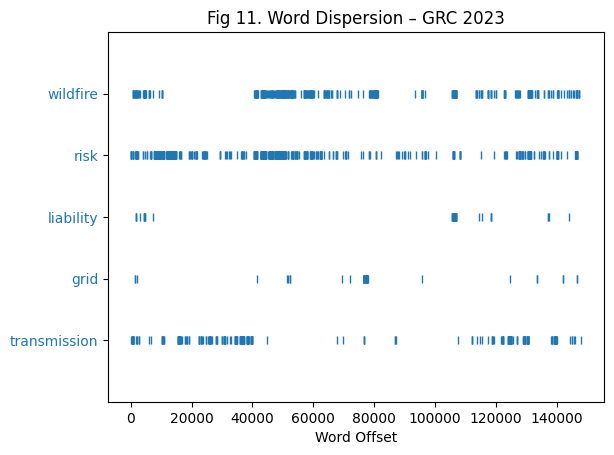

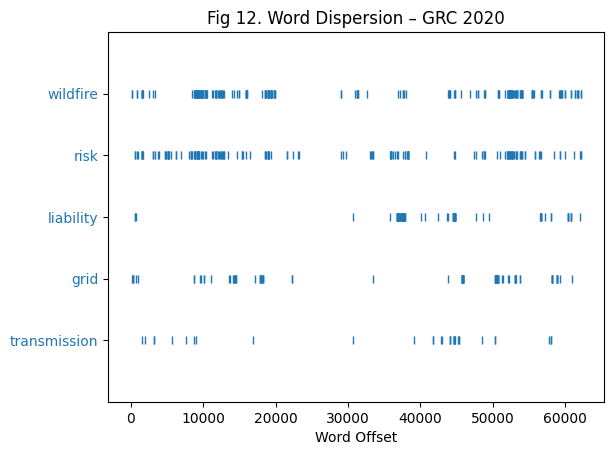

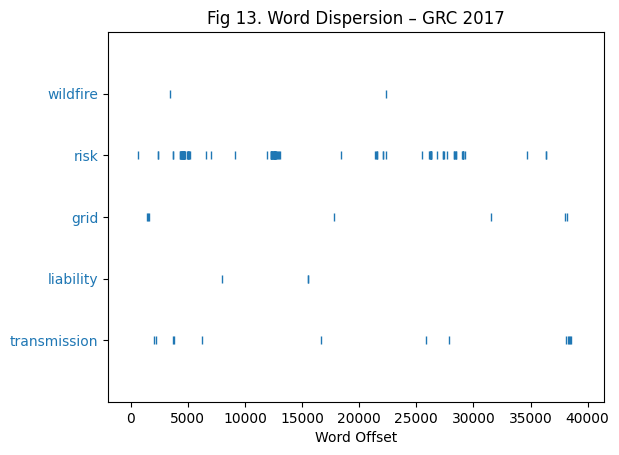

In [40]:
GRC_23 = Text(clean_2023)
GRC_23.dispersion_plot(["wildfire", 'risk', 'liability', "grid", "transmission"])
plt.title("Fig 11. Word Dispersion – GRC 2023")

GRC_20 = Text(clean_2020)
GRC_20.dispersion_plot(["wildfire", 'risk', 'liability', "grid","transmission"])
plt.title("Fig 12. Word Dispersion – GRC 2020")

GRC_17 = Text(clean_2017)
GRC_17.dispersion_plot(["wildfire", 'risk', "grid", 'liability', "transmission"])
plt.title("Fig 13. Word Dispersion – GRC 2017")

I used the matplotlib documentation to find the code plt.title to give each of the plots different titles [(Hunter et. al., 2012)](https://matplotlib.org/stable/api/index).





---

## **Conclusion & Discussion:**

As the Berkeley Lab article discusses, residential retail electricity prices have been increasing steadily, especially since 2021 [(Energy Markets and Policy Lab - Berkeley Lab 2025)](https://emp.lbl.gov/news/new-berkeley-lab-report-summarizes-trends-retail-electricity-prices-and-price-drivers). This trend is confirmed by figure 1, where both residential retail electricity prices in California and Texas begin growing significantly after 2021. However, what is notable in the same figure is that prices are much higher and more volatile in California than in Texas. And while prices have been increasing in both states since 2021, the increase has been much more pronounced in California, augmenting the price differential between the two states. Furthermore, figure 2 and 3 demonstrate that there is more price volatility in California than in Texas. So, why are there such stark differences in the price change between California and Texas?

Looking first at residential retail electricity demand (or sales from a utility perspective) in figure 4, demand has increased slightly in both states, meaning that changes in simple supply and demand dynamics can not explain the price differential between California and Texas. However, it is interesting to note that the volatility of demand has increased in California much more than in Texas. This trend is likely a result of the increase in residential rooftop solar, meaning that when there is sun, there is less demand for utility electricity and vise versa  [(The Public Advocates Office 2024)](https://www.publicadvocates.cpuc.ca.gov/-/media/cal-advocates-website/files/press-room/reports-and-analyses/241216-public-advocates-office-nem-history-fact-sheet.pdf). Additionally, because those who have rooftop solar do not buy as much electricity from the utility company, they contribute less to grid costs, which need to be redistributed to the remaining utility users, pushing up residential retail electricity prices and contributing to the increasing price differential between California and Texas [(The Public Advocates Office 2024)](https://www.publicadvocates.cpuc.ca.gov/-/media/cal-advocates-website/files/press-room/reports-and-analyses/241216-public-advocates-office-nem-history-fact-sheet.pdf). This redistribution of grid costs is a key factor in the divergence of electricity prices in the two states because as demonstrated in figure 10, Texas (ERCOT) has its fair share of solar and wind. But in Texas, most solar is utility-level solar, meaning that customers using this electricity still buy it from utility companies and thus pay for grid costs [(Cook 2024)](https://www.citizen.org/news/why-texas-leads-california-in-wind-but-not-solar/).

Another major contributing factor to the price differential in California and Texas is market structure and regulation. Figures 7-9 show that wholesale electricity prices (or the prices utility companies pay generators) in the two states are very similar, meaning that the higher prices California households pay is not because the actual electrons of electricity were more expensive to produce. CAISO prices are more regulated, meaning that they are determined by the California Public Utilities Commission (CPUC) whereas ERCOT prices are more dependent on market competition [(Kelly-Detwiler 2018)](https://www.gevernova.com/gas-power/resources/articles/2018/a-tale-of-two-isos-energy-market-design-in-Texas-and-California). For example, retail prices in California are determined based on rationale provided by major utilities and approved by CPUC through general rate cases (GRC). A text analysis of the last three GRCs for PG&E (the largest electric utility company in California) from 2017, 2020, and 2023, show that the words “transmission”, “grid”, “risk”, and “wildfire” appear significantly more in the 2020 and 2023 GRCs, which determine electricity prices for 2020-2026. This change is due to the 2019 wildfire in Northern California, which was attributed to the lack of maintenance of PG&E transmission lines [(Almasy and Holcombe 2019)](https://www.cnn.com/2019/12/07/us/pge-settlement). After this risk was exposed, PG&E and other utilities in California are likely to invest more in grid infrastructure and safety, increasing costs and thus prices for retail consumers.

Given these results, it is likely that a significant portion of the retail electricity price differential between California and Texas is due to the increasing costs of grid infrastructure and maintenance in California. These costs are then passed down to the consumer due to the more regulated CAISO market structure. Although these factors are not the only reason for the variance between California and Texas retail electricity prices, the analysis done in this research shows that there is a clear link between market structure and regulation with electricity price.
